<a href="https://colab.research.google.com/github/Roshni-seth/Machine-Learning/blob/main/Discretizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"rosh05032001","key":"0684e1839ccedea0779e4cec79194e29"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [3]:
! kaggle datasets download brendan45774/test-file

Dataset URL: https://www.kaggle.com/datasets/brendan45774/test-file
License(s): CC0-1.0
  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 24.6MB/s]


In [6]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('/content/test-file.zip')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [9]:
df=pd.read_csv('/content/test-file.zip',usecols=['Age','Fare','Survived'])

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(331, 3)

In [13]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [14]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.head(2)

,Age,Fare
281,0.75,13.775
96,76.00,78.850


In [17]:
clf=DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.5970149253731343

In [20]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.5711229946524063

In [34]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [35]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [36]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.fit_transform(X_test)

In [37]:
trf.named_transformers_['first'].n_bins_

array([15])

In [25]:
trf.named_transformers_['second'].bin_edges_

array([array([  6.4958 ,   7.75832,   7.81248,   8.54   ,  10.5    ,  16.     ,
               22.23   ,  29.025  ,  50.39664,  80.26332, 263.     ])          ],
      dtype=object)

In [38]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [39]:
output['age_labels']=pd.cut(x=X_train['Age'],
                            bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [30]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
177,54.0,9.0,55.4417,7.0,"(45.6, 61.0]","(50.397, 80.263]"
371,31.0,5.0,134.5000,9.0,"(30.2, 39.0]","(80.263, 263.0]"
1,47.0,8.0,7.0000,0.0,"(45.6, 61.0]","(6.496, 7.758]"
261,21.0,2.0,7.8542,1.0,"(18.0, 21.0]","(7.812, 8.54]"
306,30.0,5.0,151.5500,9.0,"(26.3, 30.2]","(80.263, 263.0]"


In [40]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)

In [42]:
accuracy_score(y_test,y_pred2)

0.6119402985074627

In [43]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.5650623885918004

In [50]:
def discretize(bins,strategy):
  kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

  trf=ColumnTransformer([
      ('first',kbin_age,[0]),
      ('second',kbin_fare,[1])
  ])

  X_trf=trf.fit_transform(X)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(X['Age'])
  plt.title("Before")

  plt.subplot(122)
  plt.hist(X_trf[:,0],color='red')
  plt.title("After")

  plt.show()

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(X['Fare'])
  plt.title("Before")

  plt.subplot(122)
  plt.hist(X_trf[:,0],color='red')
  plt.title("After")

  plt.show()

0.5861853832442068


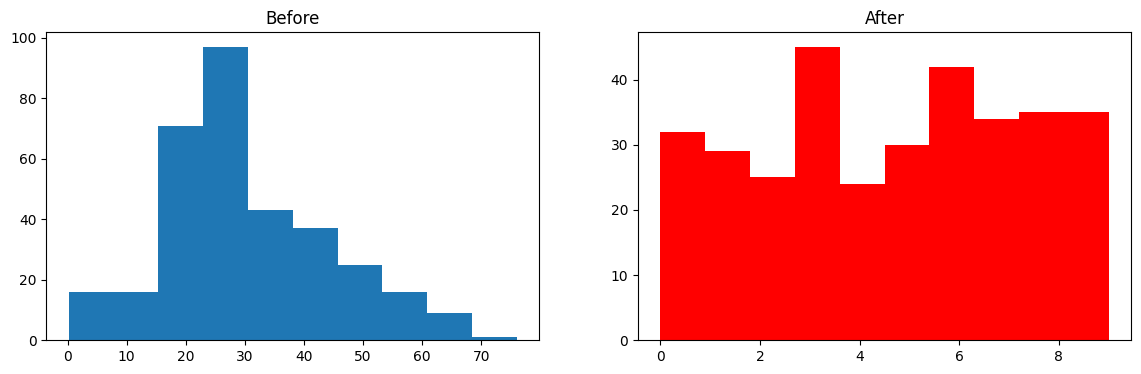

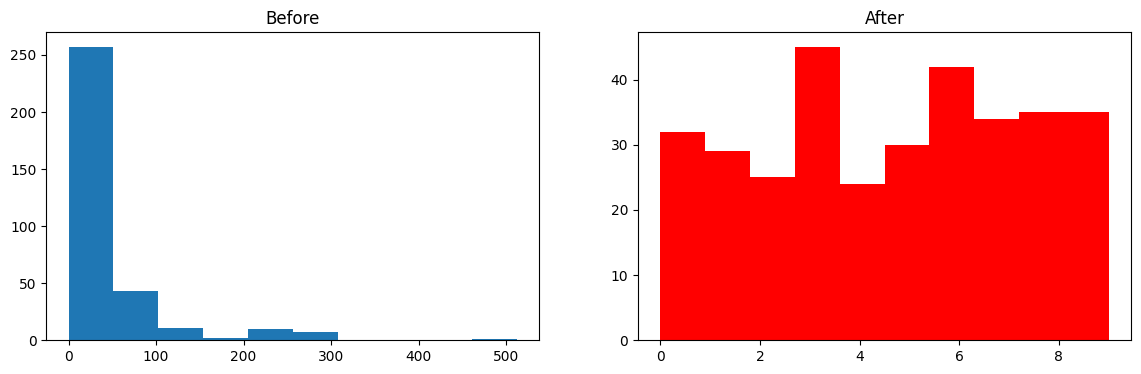

In [51]:
discretize(10,'quantile')